In [1]:
from linares_plot import *
import statsmodels.formula.api as smf

In [2]:
df= pd.read_excel('res_sim.xlsx')
df.head(10)

,bias_target,bias_dist,number_of_bumps,angle_separation,delay,order
0,-0.92,0.0,1,120.0,0.2,1
1,2.13,0.0,1,120.0,0.2,1
2,-1.13,0.0,1,120.0,0.2,1
3,-1.42,0.0,1,120.0,0.2,1
4,-0.99,0.0,1,120.0,0.2,1
5,0.55,0.0,1,120.0,0.2,1
6,-1.51,0.0,1,120.0,0.2,1
7,0.16,0.0,1,120.0,0.2,1
8,-1.64,0.0,1,120.0,0.2,1
9,0.41,0.0,1,120.0,0.2,1


In [3]:
## Function to remove outliers

def remove_outlier_mult_columns(df_in, col_names, plot=False):
    ### column names is a list of the columns to remove outliers
    outliers_booleans = []
    for col_name in col_names:        
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        #
        inf_outliers = df_in[col_name] < fence_low ## outliers = 1
        sup_outliers = df_in[col_name] > fence_high ## outliers = 1
        outliers_booleans.append ( inf_outliers + sup_outliers )
    
    outliers_bool = sum(outliers_booleans)
    outliers_bool[outliers_bool>=1] = 1
    print( 'number of outliers: ' + str(sum(outliers_bool)) )
    outliers_bool = outliers_bool == 0
    
    ###boxplots of outliers
    if plot==True:
        fig = plt.figure()
        fig.suptitle('Detection of outliers')
        pallete = sns.color_palette("viridis", n_colors=len(col_names), desat=1).as_hex()
        for idx,col_name in enumerate(col_names):
            ax1 = fig.add_subplot(1,len(col_names),idx+1)
            sns.boxplot(df_in[col_name], orient="h", ax=ax1, color=pallete[idx])

        ##
        plt.show(block=False)
    
    
    return df_in[outliers_bool]



### df1 = remove_outlier_mult_columns(df, ['bias_target'])

In [4]:
ang_sep_ = df.angle_separation.unique()
ang_sep_

array([120.  , 102.86,  90.  ,  72.  ,  51.43,  36.  ,  30.  ,  25.71,
        20.  ])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


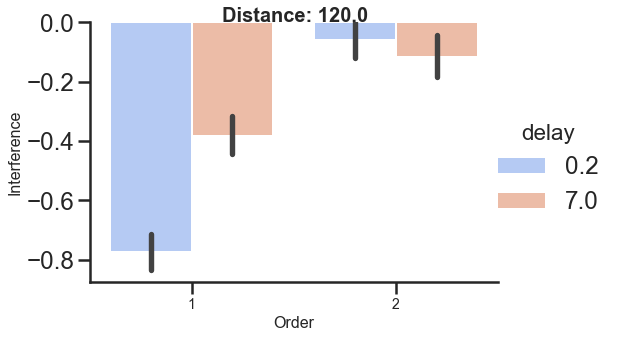

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     26.99
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.14e-17
Time:                        11:51:27   Log-Likelihood:                -3511.3
No. Observations:                2000   AIC:                             7031.
Df Residuals:                    1996   BIC:                             7053.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.5129      0.144    -10.480      

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


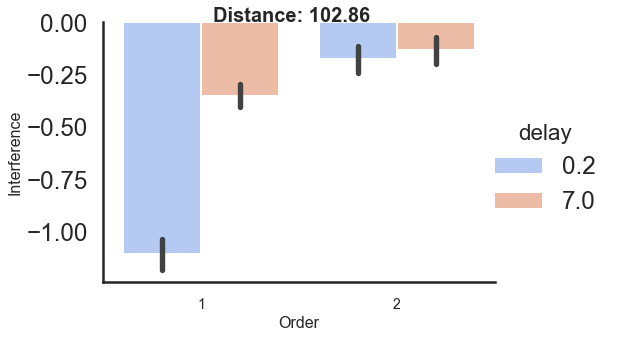

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     49.78
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.02e-31
Time:                        11:51:28   Log-Likelihood:                -3562.8
No. Observations:                2000   AIC:                             7134.
Df Residuals:                    1996   BIC:                             7156.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.0829      0.148    -14.062      

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


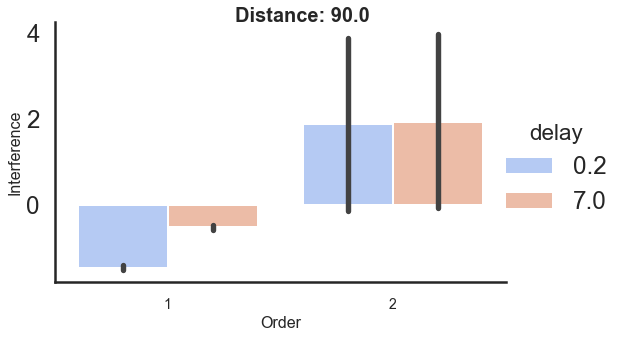

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.463
Date:                Fri, 29 Nov 2019   Prob (F-statistic):              0.223
Time:                        11:51:28   Log-Likelihood:                -9743.8
No. Observations:                2000   AIC:                         1.950e+04
Df Residuals:                    1996   BIC:                         1.952e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.8333      3.257     -1.484      

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


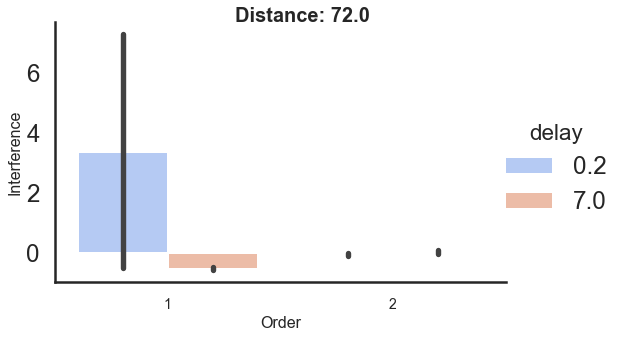

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.058
Date:                Fri, 29 Nov 2019   Prob (F-statistic):              0.366
Time:                        11:51:29   Log-Likelihood:                -10152.
No. Observations:                2000   AIC:                         2.031e+04
Df Residuals:                    1996   BIC:                         2.033e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.9870      3.995      1.749      

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


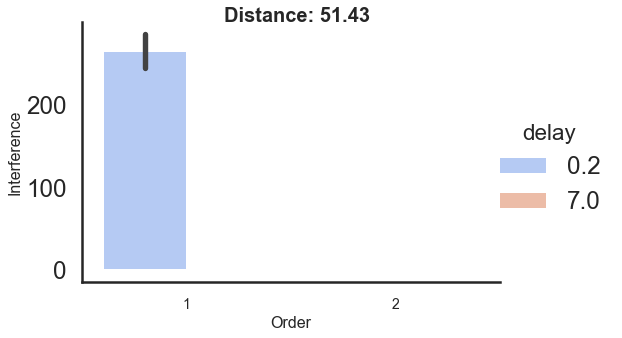

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     194.7
Date:                Fri, 29 Nov 2019   Prob (F-statistic):          9.56e-111
Time:                        11:51:29   Log-Likelihood:                -13552.
No. Observations:                2000   AIC:                         2.711e+04
Df Residuals:                    1996   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     545.1332     21.868     24.928      

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


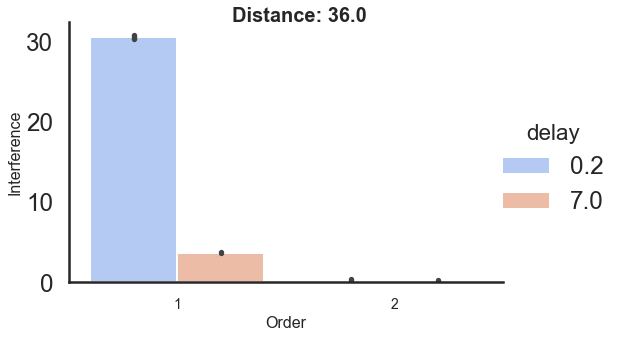

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     8221.
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:51:30   Log-Likelihood:                -5406.0
No. Observations:                2000   AIC:                         1.082e+04
Df Residuals:                    1996   BIC:                         1.084e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      62.3720      0.372    167.540      

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


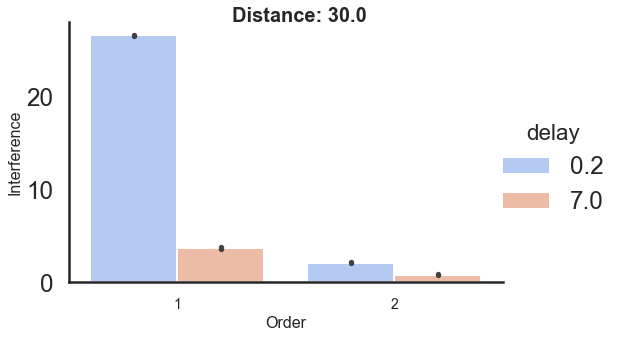

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 3.183e+04
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:51:31   Log-Likelihood:                -3698.3
No. Observations:                2000   AIC:                             7405.
Df Residuals:                    1996   BIC:                             7427.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      52.5253      0.159    331.387      

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


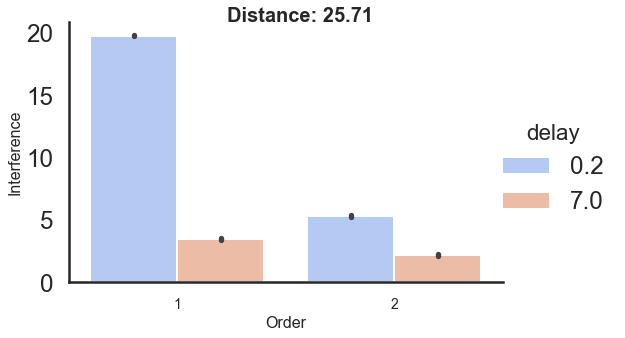

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 1.212e+04
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:51:31   Log-Likelihood:                -3846.2
No. Observations:                2000   AIC:                             7700.
Df Residuals:                    1996   BIC:                             7723.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      35.1300      0.171    205.833      

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


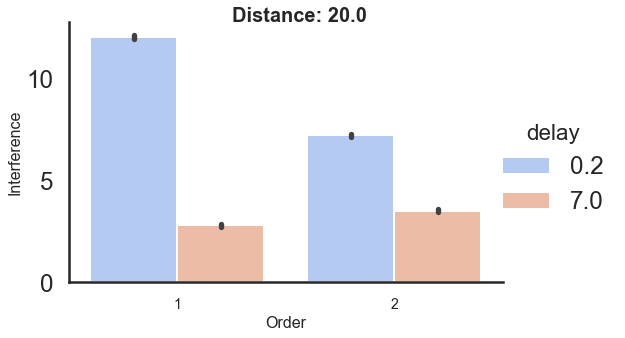

                            OLS Regression Results                            
Dep. Variable:            bias_target   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     2571.
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:51:32   Log-Likelihood:                -4092.3
No. Observations:                2000   AIC:                             8193.
Df Residuals:                    1996   BIC:                             8215.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.3755      0.193     90.022      

In [5]:
## Bar plot

for d in ang_sep_:
    df1= df.loc[df['angle_separation']==d]
    #df1 = remove_outlier_mult_columns(df1, ['bias_target'])
    g = sns.factorplot(x="order", y="bias_target", hue='delay', ci=69, data=df1, kind='bar', palette='coolwarm', aspect=1.5)
    sns.set_style('white')
    plt.xlabel('Order', fontsize=16)
    plt.ylabel('Interference', fontsize=16)
    plt.xticks([0, 1], ['1', '2'], fontsize=14)
    g.fig.suptitle('Distance: ' +str(d), fontsize=20, x=0.5, weight='demibold')
    plt.show(block=False)
    ## liniar model
    result = smf.ols(formula="bias_target ~ delay*order ", data=df1).fit()
    print(result.summary())


number of outliers: 45


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


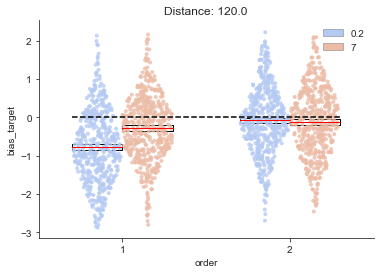

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


number of outliers: 44


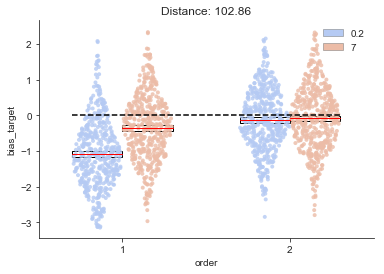

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


number of outliers: 56


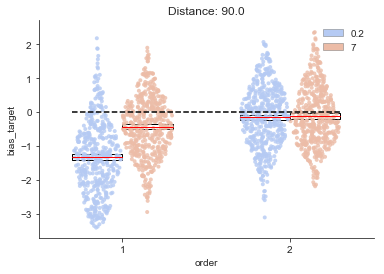

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


number of outliers: 113


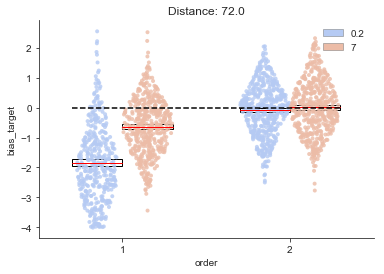

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


number of outliers: 403


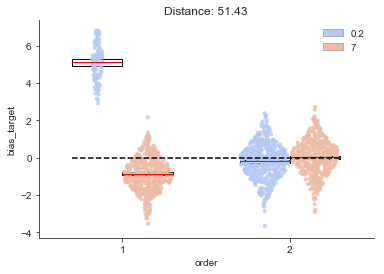

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


number of outliers: 500


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\linares_plot.py:106: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  ci= bootstraps.ci(df.groupby(x).get_group(x_idx).groupby(hue).get_group(h_idx)[y], statfunction=statistic, n_samples=10000)


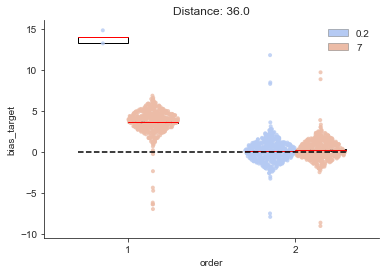

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


number of outliers: 447


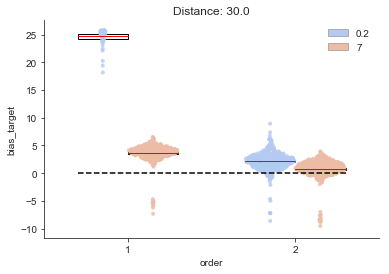

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


number of outliers: 4


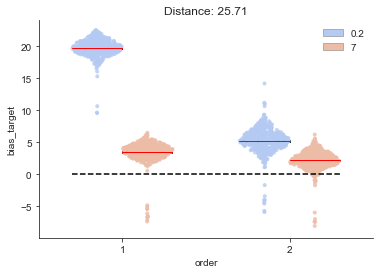

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


number of outliers: 15


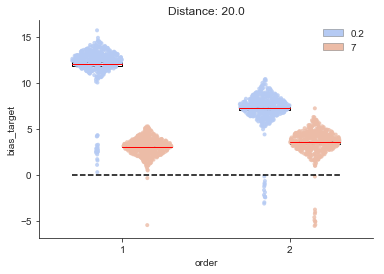

In [35]:
## Linares plot

for d in ang_sep_:
    df1= df.loc[df['angle_separation']==d]
    df1 = remove_outlier_mult_columns(df1, ['bias_target'])
    linares_plot(x='order', y='bias_target', hue='delay', df= df1, palette='coolwarm', 
                  order=[1,2], hue_order=[0.2, 7], point_size=4, alpha=0.8, width=0.6 )  
    #plt.ylim(-10,15)
    plt.plot([-.3 ,1.3], [0,0], 'k--')
    plt.title('Distance: ' +str(d))
    plt.show(block=False)